# Práctica 7a: Procesos en el *shell* de Linux.

## Objetivos

En este boletín continuaremos profundizando en el uso de la línea de comandos de Linux con unos cuantos comandos y funcionalidades adicionales de utilidad. En particular, nos centraremos en los comandos para el lanzamiento y monitorización de procesos, su control mediante envío de señales, el redireccionamiento de sus entradas
y salidas y la comunicación entre procesos mediante el uso de tuberías.

## Procesamiento de un comando en el *shell*. Lanzamiento de procesos.

Cuando ingresas un comando en terminal de Linux, el proceso que está ejecutando el código del *shell* (es decir, las instrucciones que contiene el fichero ejecutable `/usr/bin/bash`) se encarga de realizar los siguientes pasos como parte del procesamiento de la orden:

1. **Análisis sintáctico y separación de argumentos**:  El shell analiza la línea de comandos que has ingresado. Divide la línea en palabras y realiza la expansión de comodines si es necesario. También identifica el comando que deseas ejecutar y sus argumentos. Por ejemplo, para procesar la orden `ls -l directorio`, primero se separa el nombre del comando (`ls`) de las opciones y argumentos (`-l directorio`).


2. **Búsqueda del programa ejecutable**: El shell busca el programa ejecutable (o *shell script*) correspondiente en la ruta indicada en el propio comando, o bien en los directorios por defecto donde se ubican los programas instalados en el sistema. Por ejemplo, si escribimos `./miprograma`, el *shell* buscará en el directorio actual (`./`) un fichero ejecutable llamado `miprograma`. Si no especificamos la ruta al programa ejecutable, como normalmente hacemos con los comandos de Linux que estamos aprendiendo en estas prácticas (p.ej., `ls`), el shell busca en los directorios listados en la variable de entorno `PATH` un fichero ejecutable con dicho nombre (`ls`). Veremos lo que es el *path* más adelante en este boletín.


3. **Creación de un nuevo proceso**: Una vez que el *shell* ha localizado el fichero ejecutable con el nombre indicado en el comando, solicita al sistema operativo que cree un nuevo proceso. Este nuevo proceso se ejecutará de forma independiente al proceso *shell*, en su propio espacio de memoria. La creación de un nuevo proceso se hace mediante una *llamada al sistema* (i.e., una solicitud de un servicio de entre los muchos que ofrece el sistema operativo a los programas). En particular, el proceso que está ejecutando el programa *shell* hace una llamada al sistema *fork* para crear una idéntica de sí mismo (crea un "proceso hijo"), y posteriormente el *proceso hijo* hace una nueva llamada al sistema de tipo *exec*, para pasar ejecutar las instrucciones de otro programa (p.ej. las instrucciones en `/usr/bin/ls` en vez del código en `/usr/bin/bash`. La siguiente imagen ilustra cómo se lleva a cabo la creación de un nuevo proceso desde el *shell* que ejecute el comando `ls`, usando las llamadas al sistema *fork* y *exec*:

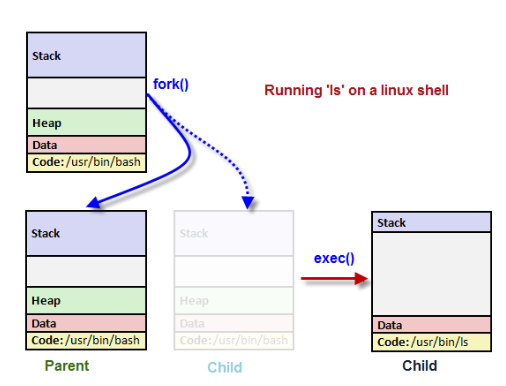

4. **Asignación de recursos y ejecución del programa**: El sistema operativo asigna recursos al nuevo proceso, como memoria, espacio en disco, identificadores de archivos y otros recursos necesarios. Cuando el sistema operativo lo considera, el proceso pasa a ejecutarse, para lo cual las instrucciones del programa correspondiente (p.ej. `/usr/bin/ls`, en el ejemplo de la imagen anterior) se cargan en memoria y comienzan a ejecutarse. Puede generar subprocesos adicionales si es necesario.


5. **Redirección de E/S (opcional)**: Si has especificado redirecciones de entrada o salida (por ejemplo, redirigir la salida estándar a un archivo), el shell establecerá estas redirecciones. Veremos esto en una sección posterior de este boletín de prácticas.


6. **Espera o ejecución en segundo plano**: Por defecto, el *shell* ("proceso padre") siempre espera a que el "proceso hijo" que está ejecutando el comando requerido termine su ejecución. Sin embargo, si se especifica con el operador `&`, el proceso hijo se ejecuta en segundo plano, lo que permite que el propio shell pueda continuar aceptando comandos mientras el proceso se ejecuta en segundo plano. Veremos esto a continuación.


7. **Finalización del proceso y código de salida**: Una vez que el proceso ha completado su tarea, se cierra y libera los recursos que ha utilizado. El shell luego muestra el resultado de la ejecución del comando en la pantalla. Además, cada proceso devuelve un código de salida al finalizar (variable de entorno `$?`), como veremos más adelante en este boletín. Un valor de 0 generalmente indica éxito, mientras que otros valores indican diversos errores o resultados. Este código puede ser útil para scripts y automatización.

<br>
<font size="5">  
    <span style="color: red;"><b>ATENCIÓN:</b><br>Se recomienda realizar los ejemplos y ejercicios propuestos de este boletín en un terminal independiente, ya que algunos de ellos <b>no pueden llevarse a cabo en Jupyter</b> debido a que es necesario interactuar con el programa lanzado mediante el teclado durante su ejecución.
    </span>
</font>  

### Lanzamiento de procesos en primer plano

Cualquier programa que podamos lanzar desde el menú del entorno gráfico se puede lanzar también desde el terminal. Hasta ahora habíamos estado lanzando, sobre todo, comandos que tienen una respuesta textual inmediata por el mismo terminal. Es decir, el programa especificado en el comando se cargaba en memoria, se ejecutaba, y el proceso correspondiente acababa enseguida, liberando de esa forma el terminal y dejándolo listo para ejecutar más comandos. Sin embargo, también pueden ejecutarse programas desde el terminal cuyos procesos resultantes no tienen por qué terminar inmediatamente. Por ejemplo, el editor de textos `gnome-text-editor`, el navegador `firefox`, etc. En realidad, el shell permite lanzar varios procesos usando una sola línea de comandos, y ello se puede hacer básicamente de dos maneras: **en primer plano o en segundo plano**.

Cuando tecleamos comandos uno por uno, terminando cada comando con la pulsación de `INTRO`, estamos lanzando procesos en secuencia, uno después de otro, de forma que cada uno de ellos siempre se ejecuta **en primer plano**. Lanzar un proceso en primer plano significa que, hasta que no acaba, el *shell* no lanza el siguiente. Aunque lo habitual es teclear un único comando y luego teclear `INTRO`, también resulta posible introducir una secuencia de comandos, cada uno con sus opciones y argumentos, separado del siguiente por punto y coma:

```bash
$ comando1 ; comando2 ; comando3 ... 
```
De esta forma, de esta forma, el shell ejecutará la secuencia de comandos uno tras otro, de la misma forma que haría si tecleamos `INTRO` tras cada uno de ellos. Cuando estamos en un *notebook* de Jupyter o en un *shell script*, el carácter de nueva línea equivale a la pulsación de `INTRO`, por lo que podemos ejecutar una secuencia de comandos simplemente colocando cada uno en una nueva línea. 

In [ ]:
echo "primer comando"
ls
touch vacio
ls vacio
cat vacio
rm vacio
echo "penúltimo comando"
ls

Esto es equivalente a colocarlos en la misma línea, separados por punto y coma. 

In [ ]:
echo "primer comando"; ls; touch vacio; ls vacio; cat vacio; rm vacio; echo "penúltimo comando"; ls

Como puedes comprobar si ejecutas el siguiente comando en un terminal (fuera de Jupyter), hasta que no acaba el último comando de la secuencia, no vuelve el *prompt* del shell. 
```bash
$ echo "voy a dormir cinco segundos..."; sleep 5; echo "despertando"
```

### Terminando, parando y relanzando procesos desde el *shell*

El *shell* ofrece un cierto control sobre los procesos lanzados en primer plano desde la propia línea de comandos, pulsando combinaciones de teclas y comandos que se utilizan para enviar *señales* a los procesos lanzados desde el shell.

- **Forzar finalización del proceso en primer plano (*matar*):** Pulsando `Ctrl-C` en el terminal se puede terminar la ejecución del proceso que en ese momento se encuentra en primer plano (en realidad, se le envía la señal `SIGINT` para interrumpir dicho proceso, lo cual por defecto hace que termine). Al hacerlo, se pasa a ejecutar el siguiente comando, o bien se libera el terminal si el comando que estaba en ejecución era el último (o el único) de la secuencia. 

- **Detener la ejecución del proceso en primer plano (*dormir*):** Pulsando `Ctrl-Z` se duerme al proceso en primer plano (es decir, se le envía la señal `SIGSTOP` para detener “en seco” su ejecución, pero sin matarlo, de forma que posteriormente podemos continuar su ejecución por donde lo habíamos dejado. Dicho proceso dormido se puede despertar luego, como veremos a continuación.

- **Despertar un proceso dormido**: Con el comando `fg` (*foreground*) podemos despertar un proceso previamente *dormido*,  devolviéndolo de nuevo a primer plano, mientras que con el comando `bg` (*background*) es posible despertarlo, pero pasándolo a segundo plano en este caso; describiremos el lanzamiento en segundo plano justo a continuación.

#### <span style="color: blue;">EJERCICIO</span>



- Prueba a copiar esta secuencia de comandos y pegarlos en un terminal, y observar el prompt durante su ejecución:
```bash
$ echo "voy a dormir diez segundos..."; sleep 10; echo "despertando"
```

- Luego, pégalos de nuevo y ejecútalos, pulsando `CTRl-C` cuando hayan transcurrido tres segundos. Verás que se termina forzosamente la secuencia y se regresa al *prompt* sin que se terminen de ejecutar el resto de comandos.

- Pulsa `CTRl-C` repetidamente para observar lo que ocurre con el *prompt*. Como verás, la señal de interrupción no hace que termine la ejecución del propio programa *shell* sino sólo la del proceso que se ha lanzado en primer plano, si lo hay. Si no hay ningún proceso ejecutándose en primer plano, al recibir la señal `SIGINT` el *shell* simplemente la ignora y vuelve a mostrar el *prompt* de nuevo.


- Repite el punto anterior, pero esta vez pulsa `CTRL-Z` cuando hayan transcurrido tres segundos. Verás que se detiene el proceso que en ese momento está en ejecución (`sleep`), de forma que el *shell* pasa inmediatamente a ejecutar el siguiente comando de la secuencia (`echo`).

### Lanzamiento de procesos en segundo plano

Lanzar un proceso en segundo plano mediante el separador de órdenes `&` (*ampersand*, en inglés, o *et* [según la RAE](https://es.wikipedia.org/wiki/%26)) indica al shell que no debe esperar a que el proceso lanzado por la orden termine su ejecución para pasar a procesar el siguiente comando:
```bash
$ comando1 & comando2 & comando3 & ... : Lanza procesos en segundo plano. 
```
En el ejemplo anterior, el *shell* procesará el primer comando, lanzando a ejecución el proceso correspondiente, e inmediatamente a continuación, sin esperar a que termine dicho proceso, pasará a procesar el segundo comando, lanzando de nuevo otro proceso, y así sucesivamente, hasta llegar a un comando que haya sido lanzado en primer plano (usando el delimitador `;` en vez de `&`), o bien volver a mostrar el prompt inmediatamente para aceptar nuevos comandos. 

Por ejemplo, si probamos a ejecutar el comando 
```bash
$ okteta &
[1] 17734
```
veremos que se abre una ventana con el editor hexadecimal que hemos utilizado en anteriores boletines de prácticas, y sin necesidad de que este proceso termine (cerremos la ventana) volvemos al prompt de forma que es posible seguir tecleando comandos en el terminal mientras `okteta` se ejecuta. Cuando se lanza un proceso en segundo plano desde el shell, éste siempre imprime su PID (*process ID* o *identificador de proceso*), un entero único que el sistema operativo asigna a cada proceso creado para gestionarlo. 

In [ ]:
okteta & 

### Monitorización y control de procesos

Los comandos más importantes para la monitorización y control de procesos desde la línea de comandos son los
siguientes:

- `ps [-Af]`: El comando `ps` (*process status*) muestra un listado de los procesos activos. Usando la primera de las opciones indicadas (`-A`), muestra todos los procesos del sistema (no sólo los lanzados desde ese terminal, que sería lo que ocurriría por defecto, en caso de lanzar el comando `ps` sin opciones). Si se usa la opción `-f`, entonces se presenta un listado de procesos más largo, que muestra distintas informaciones de interés, tales como el PID de cada proceso, su consumo de CPU, el PID de su proceso padre (PPID), la hora de lanzamiento, etc. Es muy
habitual usar ambas opciones a la vez, en la forma `ps -Af`. La salida de dicho comando muestra la información de cada proceso por columnas: usuario al que pertence el proceso, PID, PID del proceso padre, hora de comienzo, terminal asociado, tiempo de CPU consumido y línea de comando ejecutada para crear dicho proceso:

```bash
$ ps -Af
#User     # PID   #PPID   # Start # Terminal #Tcpu  # Comando
rtitos      2812       1  0 21:41 ?        00:00:01 /lib/systemd/systemd --user
[...]
rtitos      4491    2812  0 21:41 ?        00:00:13 /usr/libexec/gnome-terminal-server
[...]
rtitos      7252    4491  0 21:42 pts/1    00:00:16 /usr/bin/python3 /home/rtitos/.local/bin/jupyter-3LW3ZiviMv /home/rtitos/practica5a-procesos-boletin.ipynb
[...]
rtitos      7954    7252  0 21:42 ?        00:00:01 /usr/bin/python3 -m bash_kernel -f /home/rtitos/.local/share/jupyter/runtime/kernel-....json
[...]
rtitos     13526   12583  0 22:13 pts/4    00:00:00 ps -Af
```

In [ ]:
ps -Af

- `kill [-9] PID` : Lanza una señal al proceso identificado por su número de PID. Sin parámetro indicando el número de señal, se envía la señal número 15 (`SIGTERM`), que termina (mata) al proceso. Esto funciona en general, pero existe un mecanismo por el cual ciertos procesos pueden capturar dicha señal, evitando así su finalización. Si, aún así, se desea matar a uno de dichos procesos, la señal 9 (`SIGKILL`) lo termina forzosamente (se dice que la señal 9 no es “capturable”). Para saber el PID de un proceso determinado puede utilizarse el comando `ps` o el comando `top`, que se verá a continuación.

```bash
$ sleep 10 &
[1] 14242
$ kill 14242
[1]+  Terminado               sleep 10
```

In [ ]:
sleep 10 &

In [ ]:
# Sustituye el PID por el que obtengas al ejecutar "sleep 10" en segundo plano
kill #14242

In [ ]:
# Manual del comando "kill"
man kill

In [ ]:
# Manual de señales en Linux
man 7 signal

- `pgrep PATRÓN` , `pkill PATRÓN` : `pgrep` busca entre los procesos en ejecución aquellos cuyo nombre (dado por el nombre del fichero ejecutable) coincide con el patrón proporcionado (p.ej. una cadena), y devuelve su PID. Esto nos permite localizar de manera más directa el PID del proceso al que queremos enviar una determinada señal. Se puede usar la opción `-u username` para buscar únicamente entre los procesos de un determinado usuario, y la opción `-a` para mostrar además la orden ejecutada por cada proceso coincidente con el patrón. Por su parte, `pkill` busca de igual forma que `pgrep`, pero además envía una señal a los procesos coincidentes, por defecto la señal `SIGTERM` (15, terminación), o bien la señal indicada mediante la opción `--signal numseñal`.

```bash
$ sleep 10 &
[1] 14769
$ pgrep sleep
14769 sleep 10
$ pkill sleep
[1]+  Terminado               sleep 10
```

In [ ]:
sleep 100 &

In [ ]:
pgrep -a sleep

In [ ]:
pkill sleep

- `top` : Proporciona una vista dinámica en tiempo real de un sistema en ejecución, mostrando información de resumen del sistema, así como una lista de procesos o hilos que están siendo gestionados por el kernel de Linux, que actualiza cada 3 segundos. Entre otra información, se muestra el tiempo de actividad, tiempo que ha estado el sistema encendido, número de usuarios, el total de procesos (en diferentes estados), la utilización de la memoria física, etc. `top` muestra una línea por cada proceso en ejecución, con información agrupada en diferentes columnas, entre las que cabe destacar: el identificador de proceso (PID), el propietario, prioridad (PR), la cantidad de memoria virtual (VIRT) y RAM física (RES) utilizada, su estado (S), porcentaje de CPU utilizado desde la última actualización (CPU), tiempo total de
CPU usado desde su inicio (HORA+) y el comando utilizado para iniciarlo. A continuación, se muestra un ejemplo de la salida de top:

```bash
$ top
top - 22:26:42 up 45 min,  1 user,  load average: 0,24, 0,30, 0,37
Tareas: 247 total,   1 ejecutar,  246 hibernar,    0 detener,    0 zombie
%Cpu(s): 11,4 us,  3,8 sy,  0,0 ni, 83,5 id,  1,3 wa,  0,0 hi,  0,0 si,  0,0 st
MiB Mem :   3765,0 total,    440,2 libre,   1627,0 usado,   1697,8 búfer/caché
MiB Intercambio:   5701,0 total,   5339,2 libre,    361,8 usado.   1305,1 dispon Mem 

    PID USUARIO   PR  NI    VIRT    RES    SHR S  %CPU  %MEM     HORA+ ORDEN                                            
   4491 rtitos    20   0  988752  70732  54820 S  11,1   1,8   0:22.18 gnome-terminal-                                  
  14883 rtitos    20   0   16092   4352   3456 R  11,1   0,1   0:00.05 top                                              
    892 root      20   0 1358696  20224   6912 S   5,6   0,5   0:15.87 containerd                                       
   3032 rtitos    20   0 5224092 270264 140572 S   5,6   7,0   1:38.73 gnome-shell                                      
      1 root      20   0  167248  11392   7424 S   0,0   0,3   0:02.85 systemd                              
[...]
```


- `htop` es una alternativa a `top` con una interfaz textual más amigable, que permite usar el ratón para seleccionar los elementos de la lista de procesos, desplazarse verticalmente para ver la lista completa de procesos y horizontalmente para ver las líneas de comando completas, así como matar más de un proceso a la vez sin insertar sus PIDs, entre otras características. 

### Variables de entorno

Las variables de entorno son valores que se pueden configurar a nivel del sistema o del usuario y que están disponibles para todos los procesos en el sistema. El entorno se implementa como cadenas que representan pares clave-valor. Para mantener una lista con múltiples valores, estos suelen separarse mediante símbolos de dos puntos (`:`). Normalmente, cada par tendrá un aspecto similar a este: `KEY=value1:value2:...`. Las claves son los nombres de las variables. Por convención, las variables de entorno se escriben siempre utilizando letras mayúsculas. 

Estas variables se utilizan para proporcionar información o configuración general al sistema y a las aplicaciones. Podemos ver una lista de todas nuestras variables de entorno usando el comando `env`.
```bash
$ env
SHELL=/bin/bash
[...]
PWD=/home/jupyter-3LW3ZiviMv/fc-alumno
LOGNAME=jupyter-3LW3ZiviMv
HOME=/home/jupyter-3LW3ZiviMv
LANG=es_ES.UTF-8
[...]
PATH=/home/jupyter-3LW3ZiviMv/.local/bin:/home/alumno/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
```

La lista de variables de entorno es relativamente larga, pero entre ellas cabe destacar:
- `PATH`: Define las ubicaciones de búsqueda para ejecutables.
- `HOME`: Especifica el directorio de inicio del usuario (directorio personal o *home*).
- `LANG`: Determina la configuración regional y el idioma.


El entorno es fundamental para la interacción y el funcionamiento de un *shell*. Cuando se lanza un proceso, hereda el entorno del *shell* padre, lo que significa que tiene acceso a las mismas variables de entorno y configuraciones. Esto permite que los procesos compartan información y recursos de manera eficiente. Los usuarios pueden personalizar su entorno de *shell* ajustando las variables de entorno, configuraciones y otros elementos para satisfacer sus necesidades y preferencias específicas.

Puedes mostrar **el valor** de cualquier variable con `echo`, anteponiendo el carácter `$` al nombre de la variable:

```bash
$ echo $HOME
/home/jupyter-3LW3ZiviMv
```

Como variables que son, es posible cambiar su valor (de forma no permanente, sólo para la sesión de shell actual) simplemente realizando una asignación mediante el operador `=`, al estilo de cualquier lenguaje de programación:

```bash
$ echo $LANG
es_ES.UTF-8
$ cat hola
cat: hola: No existe el archivo o el directorio
$ LANG=en_us.utf-8
$ cat hola
cat: hola: No such file or directory
```
Modificar las variables de entorno puede ser útil cuando quieres anular la configuración por defecto, o cuando necesitas gestionar nuevas configuraciones que tu sistema no tiene por qué crear por sí mismo.

In [ ]:
echo $HOME

In [ ]:
echo $LANG

In [ ]:
echo $PWD

In [ ]:
echo $USER

In [ ]:
# Definición de una nueva variable (válida para la sesión de shell actual)
MIVARIABLE="hello, world!"

In [ ]:
echo $MIVARIABLE

#### La variable de entorno PATH

Cuando el usuario ejecuta un comando utilizando la ruta completa (ya sea absoluta o relativa) al fichero ejecutable del programa que se quiere ejecutar (p.ej. `/usr/bin/firefox`), el *shell* simplemente utiliza esa ruta para encontrar el comando. Así, para ejecutar una copia del programa `ls` ubicada en nuestro directorio personal, debemos indicar la ruta, en este caso, de forma relativa:

In [1]:
# Creamos un directorio con una copia del programa "ls" llamada "listar" y unos cuantos ficheros
mkdir -p /tmp/test-dir
cd /tmp/test-dir
cp /usr/bin/ls listar
touch hola hello ciao hej
ls

cp: no se puede crear el fichero regular 'listar': Permiso denegado
touch: no se puede efectuar `touch' sobre 'hola': Permiso denegado
touch: no se puede efectuar `touch' sobre 'hello': Permiso denegado
touch: no se puede efectuar `touch' sobre 'ciao': Permiso denegado
touch: no se puede efectuar `touch' sobre 'hej': Permiso denegado
ciao  errores  errores_cat  hej  hello  hola  listar  salida_cat  saludo.txt


In [2]:
# Relativa
./listar 

ciao  errores  errores_cat  hej  hello	hola  listar  salida_cat  saludo.txt


In [3]:
# Absoluta
/tmp/test-dir/listar

ciao  errores  errores_cat  hej  hello	hola  listar  salida_cat  saludo.txt


Sin embargo, cuando los usuarios especifican sólo un nombre de comando y no la ruta en que se encuentra (p.ej., `ls`), el *shell* busca el comando en los directorios en el orden especificado por la variable de entorno `PATH`. 

In [4]:
echo $PATH

/opt/tljh/user/bin:/opt/tljh/hub/bin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


Si se encuentra en uno de los directorios de la lista un fichero ejecutable cuyo nombre coincide con el comando tecleado, el shell creará un nuevo proceso para ejecutar dicho programa con las opciones y argumentos indicados en la orden. Así pues, la variable de entorno `PATH` le dice al shell los directorios en los que debe buscar programas instalados en el sistema, ya sea `ls`, o una aplicación de interfaz gráfica, como `firefox`. Por tanto, el correcto establecimiento de la variable `PATH` es vital para el funcionamiento del propio shell. 

Si tratamos de ejecutar un programa que no está ubicado en el `PATH` sin especificar la ruta completa al fichero ejecutable, el *shell* será incapaz de encontrar el programa que queremos ejecutar:

In [ ]:
# Comenta (#) el comando tras obtener el error
# listar

## Entrada y salidas de un proceso. Redireccionamiento.

Dado que todos los dispositivos de entrada/salida son tratados como si fueran ficheros, a un proceso no le importa si está leyendo de un teclado o de un fichero ni tampoco si está escribiendo en la pantalla o, de nuevo, en un fichero. De esta forma, cada nuevo proceso creado por el shell siempre dispone de tres ficheros abiertos a través de los cuales interactuar con el terminal de texto:

- Una **entrada estándar**, denominada *stdin*, que **por defecto es el teclado**, y a la que se le asigna el descriptor de fichero número 0.

- Una **salida estándar**, denominada *stdout*, que **por defecto es la propia pantalla del terminal**, y a la que se le asigna el descriptor de fichero número 1.

- Una **salida de error**, denominada *stderr*, que también va **por defecto a la pantalla del terminal**, y a la que se le asigna el descriptor de fichero número 2.
  
Un usuario siempre puede redireccionar cualquiera de dichas entradas/salidas desde/a un fichero en el momento de lanzar un comando, mediante los caracteres:
- `<`: para redirigir *stdin*. 
- `>`: para redirigir *stdout*. También es válido escribir 1> para redirigir la salida estándar, aunque el número 1 se omite por brevedad. 
- `2>`: para redirigir *stderr*. Como puede intuirse, el número 2 proviene del descriptor de fichero correspondiente a la salida de error. 

También podemos redirigir la salida estándar a la de error y viceversa mediante las combinaciones de caracteres `2>&1` (redirigir *stderr* a *stdout*) y `1>&2` (*stdout* a *stderr*).

Veámoslo con ejemplos:

El comando `echo`, que ya hemos utilizado en multitud de ocasiones en anteriores boletines, simplemente imprime por la salida estándar la cadena de caracteres que le pasamos como parámetro. Puesto que la salida estándar por defecto de un proceso es la pantalla, el mensaje aparecerá por pantalla si ejecutamos el comando sin ninguna redirección:

In [ ]:
echo "hola"

Ahora bien, si redirigimos la salida estándar del proceso lanzado a un fichero, ahora ya no veremos el mensaje que `echo` imprime en la pantalla, sino que dicha cadena de caracteres se escribirá en el fichero indicado.

In [ ]:
echo "hola" > saludo.txt

Si el fichero `saludo.txt` no existe, se crea y en él se escribe todo lo que el proceso en el que se ejecuta el programa `echo` escriba por su salida estándar. Si el fichero ya existe, su contenido se perderá y será reemplazado por la salida del comando.

In [ ]:
cat saludo.txt

In [ ]:
echo "buenos días" > saludo.txt

In [ ]:
cat saludo.txt

Si no queremos reemplazar el contenido del fichero sino que queremos añadir al final del mismo, debemos utilizar el operador `>>` para redireccionar la salida (en vez de `>`):

In [ ]:
echo "qué tal" >> saludo.txt

In [ ]:
cat saludo.txt

Lo mismo ocurre con la salida de error del proceso. Los mensajes de error generados al ejecutar la mayoría de comandos en la mayoría de ocasiones son el resultado de pasar opciones o argumentos incorrectos (p.ej., un fichero que no existe). Estos mensajes de error generados por los programas siempre se escriben por la salida de error, de forma que sea posible separar el flujo de mensajes convencionales de aquellos que indican error.

In [ ]:
# Si tratamos de mostrar el contenido de un fichero que no existe (comentar de nuevo tras obtener el error)
# cat saludo

Podemos redirigir la salida de error a un fichero de la siguiente forma:

In [ ]:
cat saludo 2> errores

Por supuesto, resulta habitual que un proceso escriba por ambas salidas (estándar y de error) durante su ejecución:

In [ ]:
# Comenta (#) el comando tras obtener el error
# cat saludo.txt saludo

In [ ]:
cat saludo.txt saludo > salida_cat 2> errores_cat

In [ ]:
cat salida_cat

In [ ]:
cat errores_cat

La redirección de la salida de error a un fichero resulta útil en multitud de ocasiones, por ejemplo, cuando queremos capturar todos los mensajes de error y advertencia durante el proceso de compilación de un programa (programado en un lenguaje compilado como C/C++), para después ir resolviéndolos uno a uno. 

En otras ocasiones, como por ejemplo cuando realizamos búsquedas con `find` en directorios sobre los que no tenemos permisos de acceso, podemos descartar ese (largo) listado de errores haciendo un redireccionamiento de la salida de error al **dispositivo nulo** `/dev/null`, que no es sino un fichero especial que descarta todo lo que se escribe en él. Un ejemplo de este redireccionamiento podría ser el siguiente:

In [ ]:
# Comenta (#) de nuevo el comando tras obtener el error
# find /root /boot /etc /proc -name "password"

In [ ]:
find /root /boot /etc /proc -name "password" 2> /dev/null

Por último, también es posible redirigir la entrada estándar de un proceso mediante `<`, para que lea de un fichero en vez de teclado. Veamos un ejemplo con el comando `sort`, que ordena líneas.

In [ ]:
# Creamos un fichero con diferentes líneas
echo "uvas" > frutas
echo "manzanas" >> frutas
echo "peras" >> frutas
echo "plátanos" >> frutas
echo "naranjas" >> frutas

In [ ]:
# Estamos redirigiendo la entrada estándar de sort para 
# que lea del fichero frutas
sort < frutas

En realidad, el comando `sort`, como la mayoría de comandos de Linux, lee de la entrada estándar cuando no se le proporciona ningún fichero como argumento. Sin embargo, la sintaxis de prácticamente todos los comandos dicta que es posible pasar una lista de ficheros como parámetro, los cuales serán utilizados como datos de entrada al comando. Por tanto, también podríamos haber invocado `sort` así:

In [ ]:
# En este caso, le pasamos el fichero como argumento
sort frutas

El resultado es el mismo en ambos casos; por esa razón, la redirección de la entrada estándar no se suele utilizar con comandos, ya que podemos hacer lo mismo sin necesidad de usar la redirección.

No obstante, la redirección de la entrada estándar puede resultar útil cuando estamos realizando repetidamente  pruebas con un programa al que debemos proporcionarle ciertos valores o comandos propios del programa.

En realidad, `sort`, al igual que `grep`, pertenece a un tipo de comandos llamados *filtros*, que se utilizan como parte de comandos *entubados*, como veremos en el siguiente boletín, en los que la entrada estándar de un proceso **se conecta** a la salida estándar de otro proceso, de forma que pueden comunicarse datos para realizar un determinado procesamiento por etapas sobre un texto, formando un *pipeline*.

In [ ]:
cat frutas

In [ ]:
cat frutas | sort

Como ejemplo sencillo que ilustra este concepto, mostramos la forma de filtrar ciertas líneas de un fichero que ha sido ordenado previamente.

In [ ]:
cat frutas | sort | grep an

Veremos la tremenda potencia del uso de **tuberías** en el siguiente boletín.

**FIN DEL CUADERNO** (*no borres esta celda*)

@@@@ practica7a-procesos-boletin.ipynb @@@@